In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df = pd.read_csv('winequalityN.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
print(df['type'].value_counts(normalize=True))

print(df['quality'].value_counts(normalize=True))

white    0.753886
red      0.246114
Name: type, dtype: float64
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64


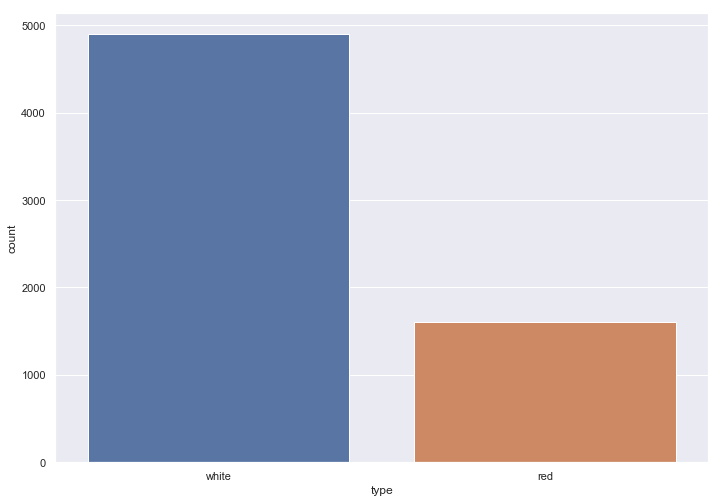

In [5]:
# countplot to know the count of white and red wine
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.countplot(x='type', data=df)
plt.show()

In [6]:
# Change the attribute type from categorical to numerical values
df = df.replace({'type': {'white': 1, 'red': 2}})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null int64
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


In [7]:
print(df.isnull().sum())

df.dropna(inplace=True)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [8]:
# Display a description of the dataset
print(df.describe())

              type  fixed acidity  volatile acidity  citric acid  \
count  6463.000000    6463.000000       6463.000000  6463.000000   
mean      1.246480       7.217755          0.339589     0.318758   
std       0.430995       1.297913          0.164639     0.145252   
min       1.000000       3.800000          0.080000     0.000000   
25%       1.000000       6.400000          0.230000     0.250000   
50%       1.000000       7.000000          0.290000     0.310000   
75%       1.000000       7.700000          0.400000     0.390000   
max       2.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6463.000000  6463.000000          6463.000000           6463.000000   
mean         5.443958     0.056056            30.516865            115.694492   
std          4.756852     0.035076            17.758815             56.526736   
min          0.600000     0.009000             1.000000        

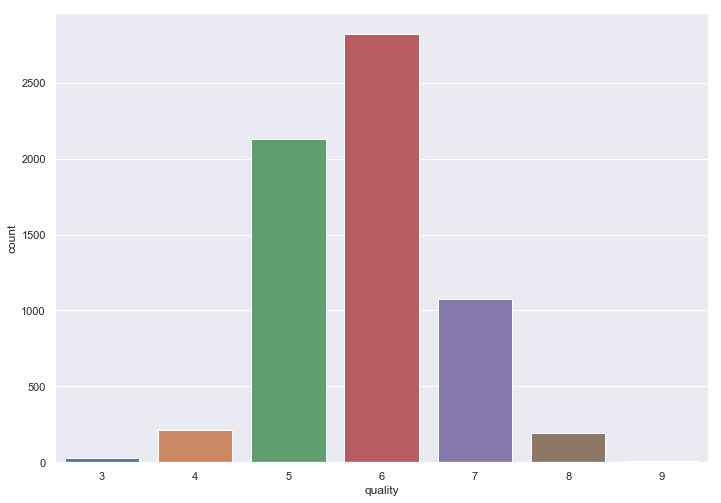

In [9]:
# countplot to know the value counts of quality
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.countplot(x='quality', data=df)
plt.show()

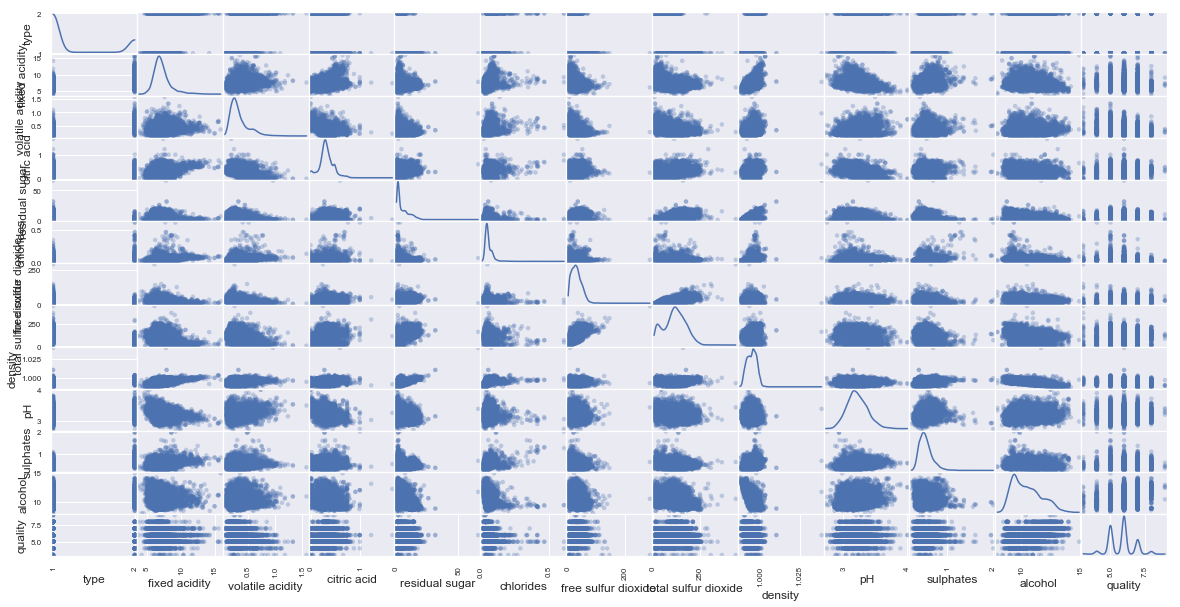

In [10]:
#correlation between features
axes = pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (20,10), diagonal = 'kde' ,s=80)
corr = df.corr().values
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


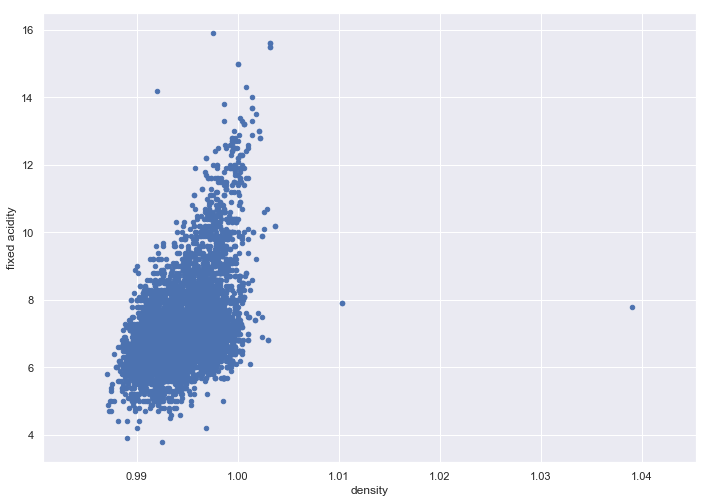

In [11]:
# From the correlation plot, we can say that we have high correlation
# between density and fixed acidity

# scatter plot for density and fixed acidity
df.plot(kind='scatter', x='density', y= 'fixed acidity')
plt.show()

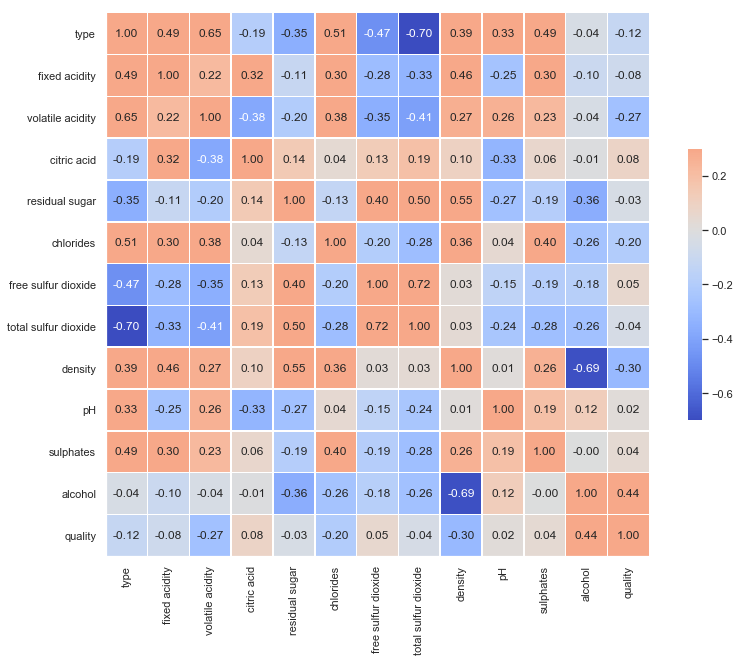

In [12]:
# correlation plot to know which attributes show highest correlation
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5,
                cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14, 10)
plt.show()

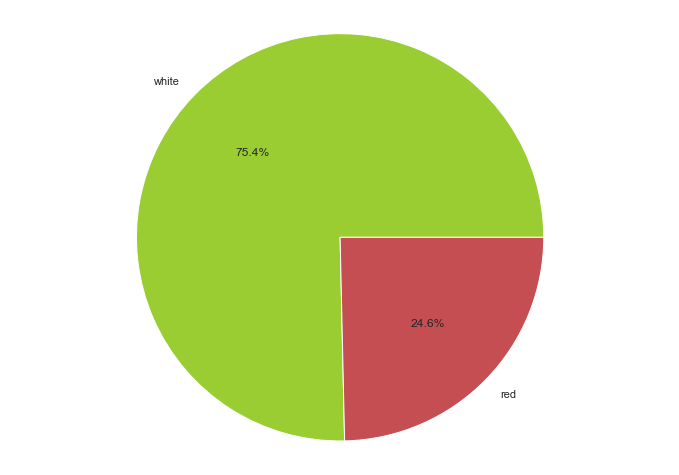

In [13]:
fig, ax = plt.subplots(1, 1)
ax.pie(df.type.value_counts(), autopct='%1.1f%%', labels=['white','red'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')
plt.show()

In [14]:
def quality_bin(x):
    if x <= 5:
        return 0
    else:
        return 1
    
y = df['quality'].map(quality_bin)
X = df.drop(['quality'], axis=1)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)

In [15]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1]}
# k_near_params = {"n_neighbors": list(range(2, 5, 1)), 'algorithm': ['auto', 'kd_tree']}
# svc_params = {'C': [0.5, 1], 'kernel': ['sigmoid', 'linear']}
# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 6, 1)), "min_samples_leaf": list(range(5, 8, 1))}

classifiers = {
    "LogisiticRegression": (LogisticRegression(), log_reg_params),
    "KNearest": (KNeighborsClassifier(), None),
    "Naive Bayes": (GaussianNB(), None),
}


def get_best_model(model, params, X, y):
    model = GridSearchCV(model, params)
    model.fit(X, y)
    return model.best_estimator_


def run_all_models(X, y, choose_best_model=True, folds=5):
    for classifier_name, (classifier, params) in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        accuracy_scores = []
        estimators = []
        for train_index, test_index in k_fold.split(X, y):
            X_train, X_test = pd.DataFrame(data=X, index=train_index), pd.DataFrame(data=X, index=test_index)
            y_train, y_test = pd.DataFrame(data=y, index=train_index), pd.DataFrame(data=y, index=test_index)
            X_train.dropna(axis=0, inplace=True)
            X_test.dropna(axis=0, inplace=True)
            y_train.dropna(axis=0, inplace=True)
            y_test.dropna(axis=0, inplace=True)
            if params is None or not choose_best_model:
                model = classifier
                model.fit(X_train, y_train)
            else:
                model = get_best_model(classifier, params, X_train, y_train)
            estimators.append(model)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            accuracy_scores.append(accuracy_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean Accuracy score: {}'.format(np.array([accuracy_scores]).mean()))
        best_iteration = accuracy_scores.index(max(accuracy_scores))
        best_estimator = estimators[best_iteration]
        print('Best estimator: {}'.format(estimators[best_iteration]))

        print('******* Real test dataset metrics *******')
        y_final_pred = best_estimator.predict(X_final_test)
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))


In [16]:
run_all_models(X_final_train, y_final_train)





============================= Naive Bayes =============================
Mean cross validation score: 0.6874729048048996
Mean Accuracy score: 0.7012382978376699
Best estimator: GaussianNB(priors=None, var_smoothing=1e-09)
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6264501160092807
confusion matrix for the real test set:
 [[236 239]
 [244 574]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       475
           1       0.71      0.70      0.70       818

    accuracy                           0.63      1293
   macro avg       0.60      0.60      0.60      1293
weighted avg       0.63      0.63      0.63      1293

============================= KNearest =============================
Mean cross validation score: 0.6450936028502141
Mean Accuracy score: 0.6932923285568094
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowsk